<a href="https://colab.research.google.com/github/arishp/srm-ap-genai-2024/blob/main/03_Fundamentals_Agents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langgraph langsmith
!pip install langchain langchain_groq langchain_community

In [1]:
from google.colab import userdata
groq_key = userdata.get('GROQ_API_KEY')
langsmith_key = userdata.get('LANGSMITH_API_KEY')

In [2]:
import os
os.environ['LANGCHAIN_TRACING_V2'] = 'true'
os.environ['LANGCHAIN_ENDPOINT'] = "https://api.smith.langchain.com"
os.environ['LANGCHAIN_API_KEY'] = langsmith_key
os.environ['LANGCHAIN_PROJECT'] = "srm-langgraph-intro"

In [3]:
from langchain_groq import ChatGroq

In [4]:
llm = ChatGroq(api_key=groq_key, model_name='gemma2-9b-it')
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7974a6fa2050>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7974a6fe0c10>, model_name='gemma2-9b-it', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [7]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [8]:
class State(TypedDict):
  messages: Annotated[list, add_messages]

In [9]:
graph_builder = StateGraph(State)

In [10]:
def chatbot(state:State):
  return {'messages':llm.invoke(state['messages'])}

In [11]:
graph_builder.add_node('chatbot', chatbot)

In [12]:
graph_builder.add_edge(START, 'chatbot')
graph_builder.add_edge('chatbot', END)
app = graph_builder.compile()

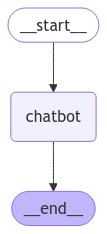

In [14]:
from IPython.display import Image, display
try:
  display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [15]:
while True:
  user_input = input("User: ")
  if user_input.lower() in ['quit', 'q']:
    print('good bye')
    break
  for event in app.stream({'messages': ("user", user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:", value['messages'].content)

User: hello
dict_values([{'messages': AIMessage(content='Hello! 👋  \n\nWhat can I do for you today? 😊\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 10, 'total_tokens': 27, 'completion_time': 0.030909091, 'prompt_time': 4e-07, 'queue_time': 0.013341059, 'total_time': 0.030909491}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-66da68c2-28be-4ae1-a3fd-afca5dc4a110-0', usage_metadata={'input_tokens': 10, 'output_tokens': 17, 'total_tokens': 27})}])
content='Hello! 👋  \n\nWhat can I do for you today? 😊\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 10, 'total_tokens': 27, 'completion_time': 0.030909091, 'prompt_time': 4e-07, 'queue_time': 0.013341059, 'total_time': 0.030909491}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-66da68c2-28